## rugplot
This function is intended to complement other plots by showing the location of individual observations in an unobstrusive way.

In [2]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

In [9]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.shape

(244, 7)

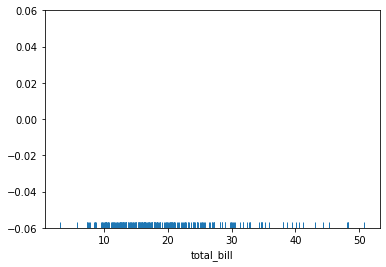

In [11]:
sns.rugplot(tips['total_bill']);

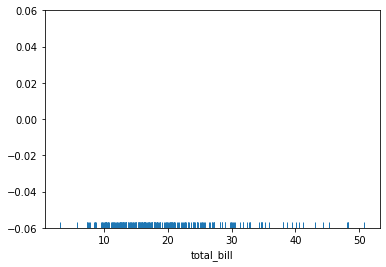

In [12]:
sns.rugplot(x='total_bill', data=tips);

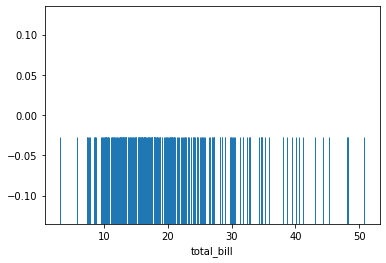

In [13]:
sns.rugplot(x='total_bill', data=tips, height=0.4);   # default height = 0.025

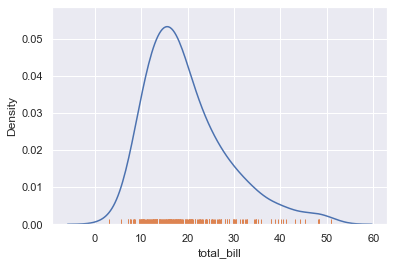

In [16]:
# Add a rug along one of the axes:

sns.set_theme()

sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill");

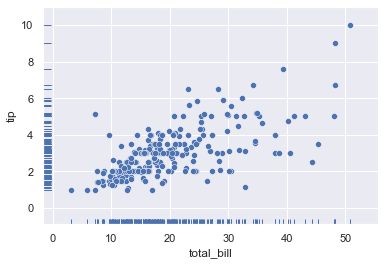

In [18]:
# Add a rug along both axes:

sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip");

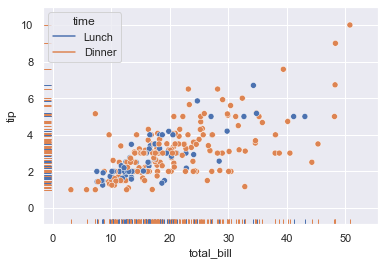

In [20]:
# Represent a third variable with hue mapping:

sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="time");

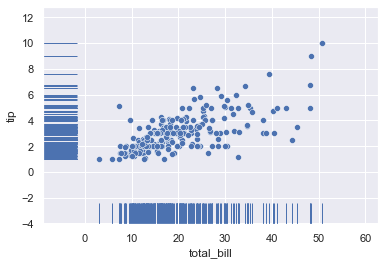

In [22]:
# Draw a taller rug:

sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=.1);

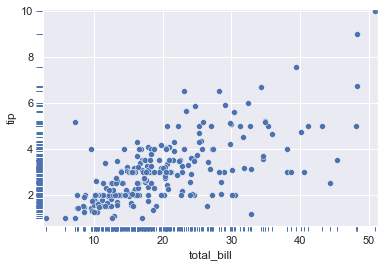

In [24]:
# Put the rug outside the axes:

sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-.02, clip_on=False);

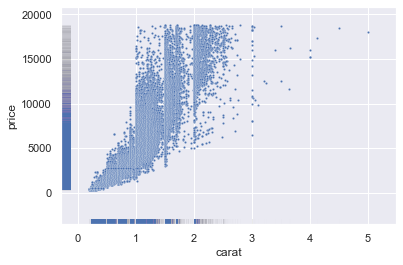

In [26]:
# Show the density of a larger dataset using thinner lines and alpha blending:

diamonds = sns.load_dataset("diamonds")
sns.scatterplot(data=diamonds, x="carat", y="price", s=5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005);

## EXAMPLES

In [3]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

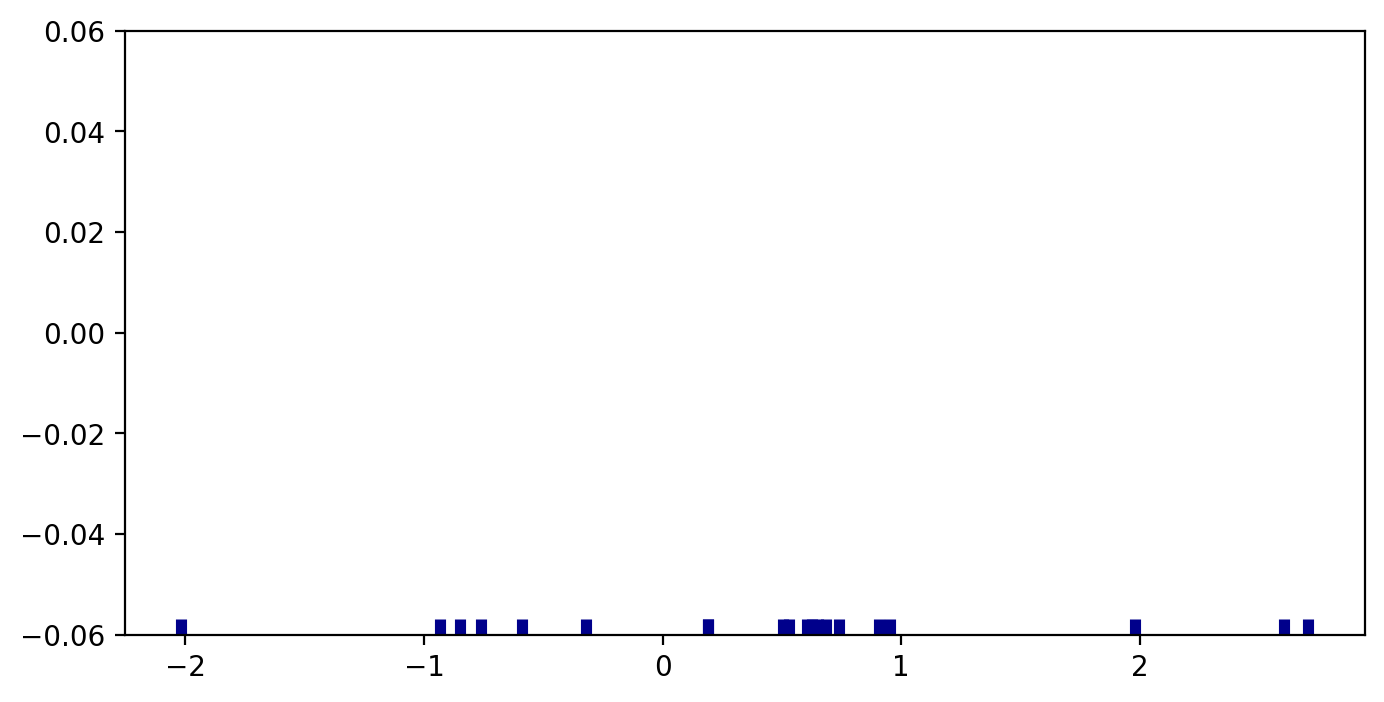

In [5]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

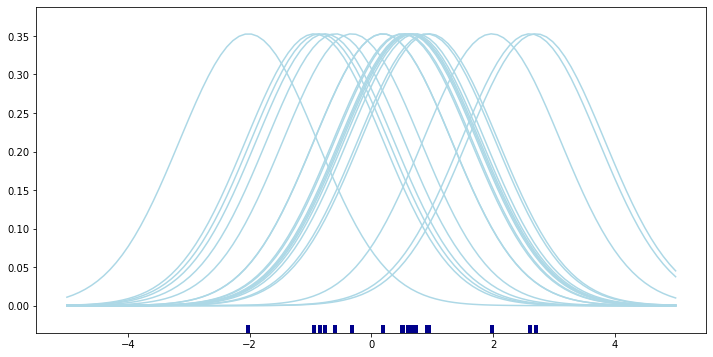

In [6]:
from scipy import stats

plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

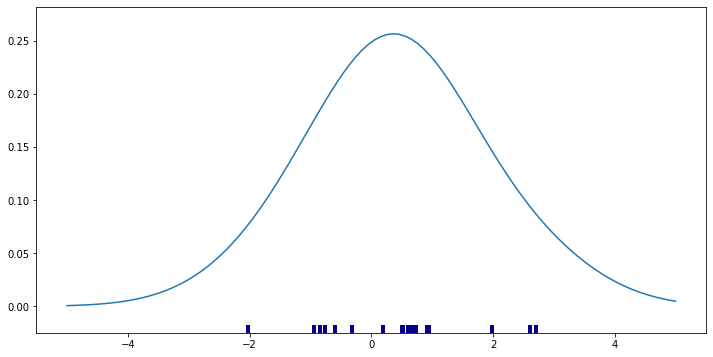

In [8]:
plt.figure(figsize=(8,4),dpi=200)
from scipy.integrate import trapz
plt.figure(figsize=(12,6))
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

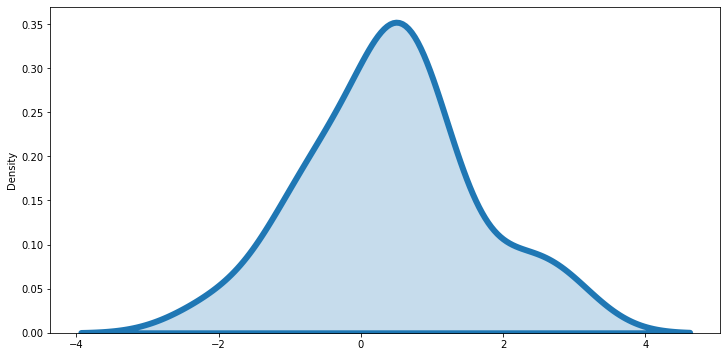

In [10]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4)
sns.kdeplot(x,linewidth=6,shade=True);